In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

### Step関数　と　Stepを使ったForward

In [2]:
#-----------------------------------
def stepFunction(t):
  if t >= 0: # 0 も Positiveとみなす
    return 1
  return 0

#-----------------------------------
def prediction(X, W, b):
  return stepFunction((np.matmul(X, W) + b)[0])

### Forward & BackPropagation 用の関数の定義

In [3]:
#-----------------------------------
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        # 一つずつ値を予測する
        y_pred = prediction(X[i], W, b)

        # 誤分類<1> 予測=0 / 正解=1
        if (y_pred - y[i]) == -1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b    += learn_rate

        # 誤分類<2> 予測=1 / 正解=0
        elif (y_pred - y[i]) == 1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b    -= learn_rate

    return W, b


### 指定エポック、Forward & BackPropagationを実行する関数

In [4]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
  x_min, x_max = min(X.T[0]), max(X.T[0])
  y_min, y_max = min(X.T[1]), max(X.T[1])
    
  W = np.array(np.random.rand(2, 1))
  b = np.random.rand(1)[0] + x_max
    
  # These are the solution lines that get plotted below.
  boundary_lines = []
    
  for i in range(num_epochs):
    # In each epoch, we apply the perceptron step.
    W, b = perceptronStep(X, y, W, b, learn_rate)
    
    boundary_lines.append((-W[0] / W[1], -b / W[1]))
    
  return boundary_lines


### データの読み込み

In [5]:
# 以下の方法では、ヘッダではない1行目が取得できない
# csv_data = pd.read_csv("data_quiz_09.csv")
# X = csv_data.iloc[:, :-1].values # 最後の列の1個手前まで
# y = csv_data.iloc[:,-1].values   # 最後の列を指定

# csvデータの読み込み : ここでは、ともに1列のデータ
csv_data = np.loadtxt("data_quiz_09.csv", delimiter=',')
X = csv_data[:, :-1]
y = csv_data[:, -1]

### Trainingの実行

In [6]:
boundary_lines = trainPerceptronAlgorithm(X,y)
print( "type(boundary_lines) = ", type(boundary_lines) )
print( "len(boundary_lines)  = ", len(boundary_lines) )
print( boundary_lines[:5] )

type(boundary_lines) =  <class 'list'>
len(boundary_lines)  =  25
[(array([-0.05239463]), array([-2.04919443])), (array([1.23772563]), array([-2.90815949])), (array([-39.47663703]), array([23.57864461])), (array([-13.13237331]), array([7.06473087])), (array([-9.11612538]), array([4.57527519]))]


### Step関数 Perceptronの予測結果の表示

Text(0.5, 1.0, 'red=[y=0]  /  blue=[y=1]')

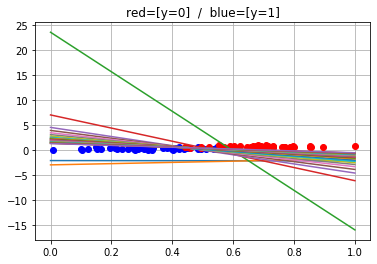

In [7]:
for i,tmp_y in enumerate(y):
    if tmp_y == 0:
        plt.plot(X[i,0], X[i,1], 'ro')
        #plt.plot(X[i,1], X[i,0], 'ro')

    else:
        plt.plot(X[i, 0], X[i, 1], 'bo')
        #plt.plot(X[i, 1], X[i, 0], 'bo')

for i in range(len(boundary_lines)):
    #print("i = ", i)
    x_data = [0,1]
    y_data = boundary_lines[i][0]*x_data + boundary_lines[i][1]
    #print(x_data)
    #print(y_data)
    plt.plot(x_data, y_data)        
        
        
plt.grid()
plt.title("red=[y=0]  /  blue=[y=1]")